Refer to the following pages for `bias` initialization.
- In general, biases are set to zeros (zero initialization).
    - https://cs231n.github.io/neural-networks-2/
- TensorFlow adopt zero initialization for biases as well.
    - https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
- PyTorch do not apply zero initialization for biases.
    - https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

Initializing the biases. It is possible and common to initialize the biases to be zero, since the asymmetry breaking is provided by the small random numbers in the weights. For ReLU non-linearities, some people like to use small constant value such as 0.01 for all biases because this ensures that all ReLU units fire in the beginning and therefore obtain and propagate some gradient. However, it is not clear if this provides a consistent improvement (in fact some results seem to indicate that this performs worse) and it is more common to simply use 0 bias initialization.

# Weight Initialization (only weights not biases)
---

Why does weight initialization matter?

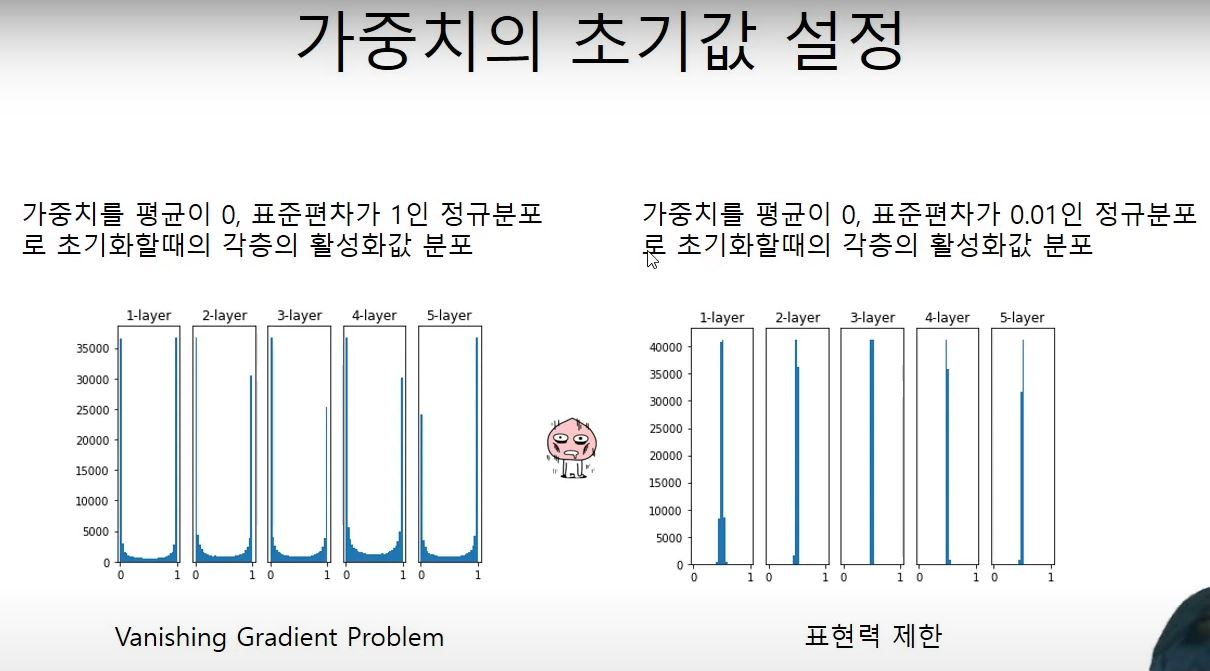

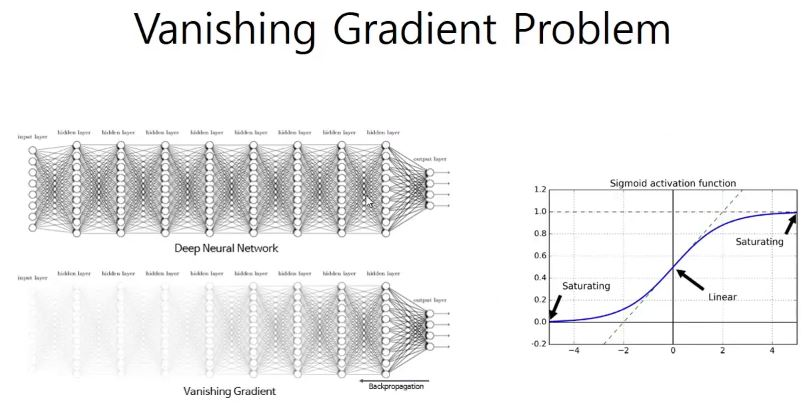

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

In [3]:
input_data = np.random.randn(1000, 100) # batch size: 1000
node_num = 100 # the number of neurons in the hidden layer
hidden_layer_size = 5
activations = {} # keys: hidden layers, values: outputs of each hidden layer

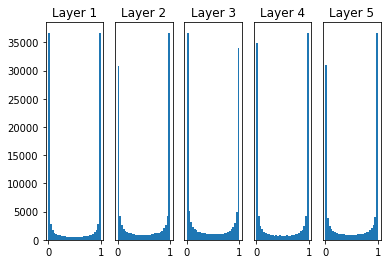

In [4]:
x = input_data

for i in range(hidden_layer_size):
    # loop: from the first layer to the last layer
    if i != 0:
        x = activations[i - 1]
        
    # Try different initial weight settings (w/o biases)
    # by adjusting standard deviations.
    # two extreme cases -> stdev 1, stdev 0.01
    # alleviated cases -> stdev np.sqrt(1.0 / num_node)
    w = np.random.randn(node_num, input_data.shape[1]) * 1 # vanishing gradient
    # w = np.random.randn(node_num, input_data.shape[1]) * 0.01 # limited range
    # w = np.random.randn(node_num, input_data.shape[1]) * np.sqrt(1.0 / node_num) # more desirable shape
    # w = np.random.randn(node_num, input_data.shape[1]) * np.sqrt(2.0 / node_num) # more desirable shape
    
    a = np.dot(x, w) # affine transformation (matrix multiplication operation)
    
    # Try different activation functions.
    z = sigmoid(a)
    # z = relu(a)
    # z = tanh(a)
    
    activations[i] = z
    
# histograms
for i, a in activations.items():
    plt.subplot(1, len(activations), i + 1)
    plt.title('Layer ' + str(i + 1))
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range = (0, 1)) # the number of bins: 30
plt.show()

In [5]:
input_data = np.random.randn(1000, 100) # batch size: 1000
node_num = 100 # the number of neurons in the hidden layer
hidden_layer_size = 5
activations = {} # keys: hidden layers, values: outputs of each hidden layer

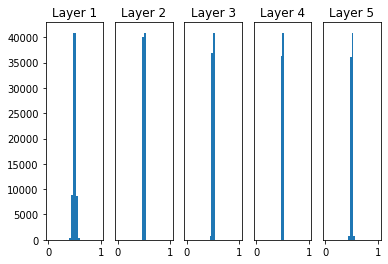

In [6]:
x = input_data

for i in range(hidden_layer_size):
    # loop: from the first layer to the last layer
    if i != 0:
        x = activations[i - 1]
        
    # Try different initial weight settings (w/o biases)
    # by adjusting standard deviations.
    # two extreme cases -> stdev 1, stdev 0.01
    # alleviated cases -> stdev np.sqrt(1.0 / num_node)
    # w = np.random.randn(node_num, input_data.shape[1]) * 1 # vanishing gradient
    w = np.random.randn(node_num, input_data.shape[1]) * 0.01 # limited range
    # w = np.random.randn(node_num, input_data.shape[1]) * np.sqrt(1.0 / node_num) # more desirable shape
    # w = np.random.randn(node_num, input_data.shape[1]) * np.sqrt(2.0 / node_num) # more desirable shape
    
    a = np.dot(x, w) # affine transformation (matrix multiplication operation)
    
    # Try different activation functions.
    z = sigmoid(a)
    # z = relu(a)
    # z = tanh(a)
    
    activations[i] = z
    
# histograms
for i, a in activations.items():
    plt.subplot(1, len(activations), i + 1)
    plt.title('Layer ' + str(i + 1))
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range = (0, 1)) # the number of bins: 30
plt.show()

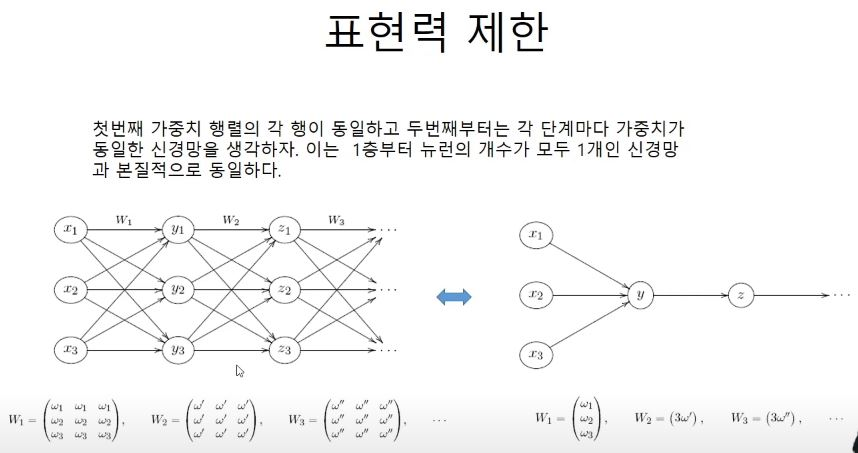

LeCun Initialization / Xavier Initialization (for the Sigmoid activation function)

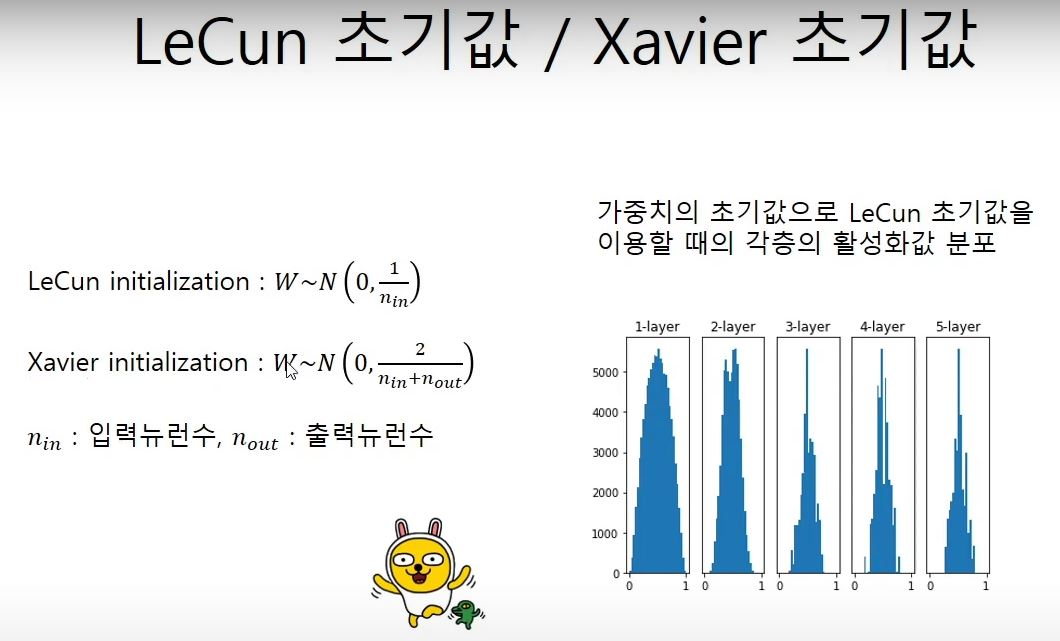

He Initialization (for the ReLU activation function)

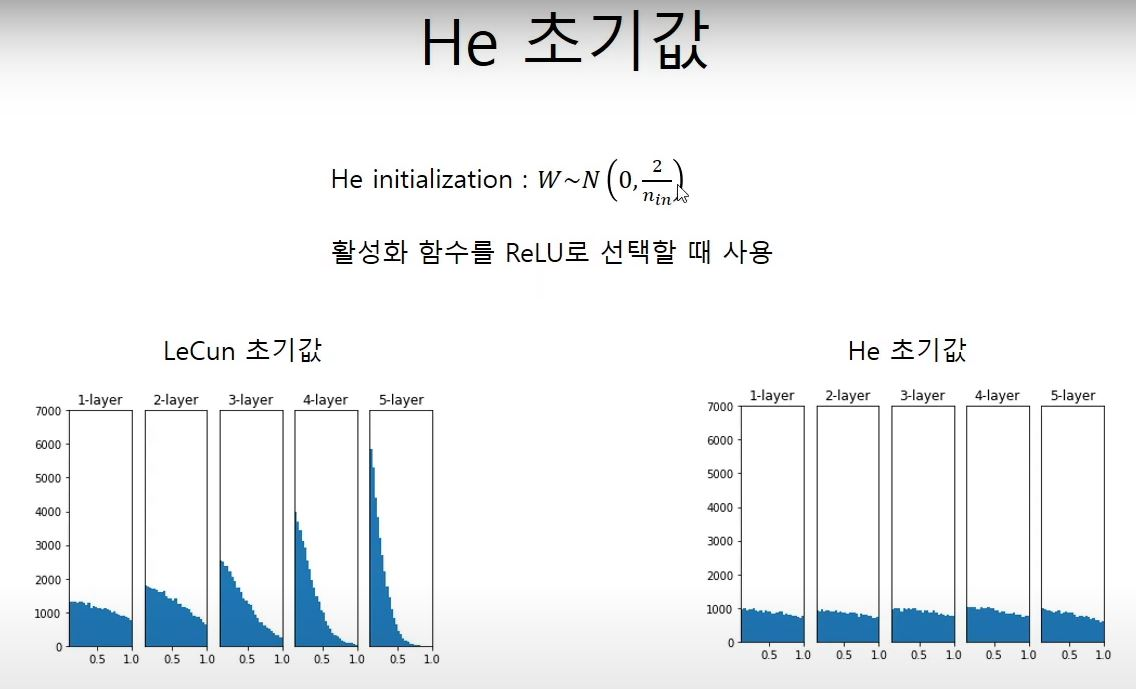

In [7]:
input_data = np.random.randn(1000, 100) # batch size: 1000
node_num = 100 # the number of neurons in the hidden layer
hidden_layer_size = 5
activations = {} # keys: hidden layers, values: outputs of each hidden layer

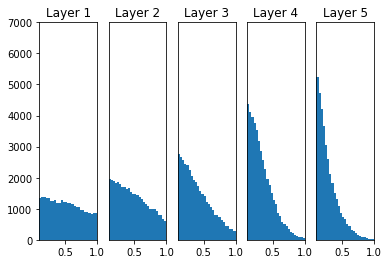

In [8]:
x = input_data

for i in range(hidden_layer_size):
    # loop: from the first layer to the last layer
    if i != 0:
        x = activations[i - 1]
        
    # Try different initial weight settings (w/o biases)
    # by adjusting standard deviations.
    # two extreme cases -> stdev 1, stdev 0.01
    # alleviated cases -> stdev np.sqrt(1.0 / num_node)
    # w = np.random.randn(node_num, input_data.shape[1]) * 1 # vanishing gradient
    # w = np.random.randn(node_num, input_data.shape[1]) * 0.01 # limited range
    w = np.random.randn(node_num, input_data.shape[1]) * np.sqrt(1.0 / node_num) # more desirable shape
    # w = np.random.randn(node_num, input_data.shape[1]) * np.sqrt(2.0 / node_num) # more desirable shape
    
    a = np.dot(x, w) # affine transformation (matrix multiplication operation)
    
    # Try different activation functions.
    # z = sigmoid(a)
    z = relu(a)
    # z = tanh(a)
    
    activations[i] = z
    
# histograms
for i, a in activations.items():
    plt.subplot(1, len(activations), i + 1)
    plt.title('Layer ' + str(i + 1))
    if i != 0: plt.yticks([], [])
    plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range = (0, 1)) # the number of bins: 30
plt.show()

In [9]:
input_data = np.random.randn(1000, 100) # batch size: 1000
node_num = 100 # the number of neurons in the hidden layer
hidden_layer_size = 5
activations = {} # keys: hidden layers, values: outputs of each hidden layer

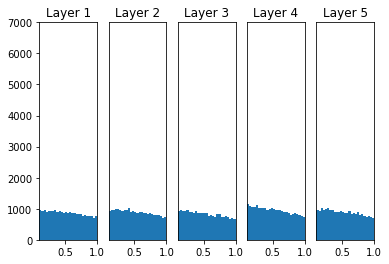

In [10]:
x = input_data

for i in range(hidden_layer_size):
    # loop: from the first layer to the last layer
    if i != 0:
        x = activations[i - 1]
        
    # Try different initial weight settings (w/o biases)
    # by adjusting standard deviations.
    # two extreme cases -> stdev 1, stdev 0.01
    # alleviated cases -> stdev np.sqrt(1.0 / num_node)
    # w = np.random.randn(node_num, input_data.shape[1]) * 1 # vanishing gradient
    # w = np.random.randn(node_num, input_data.shape[1]) * 0.01 # limited range
    # w = np.random.randn(node_num, input_data.shape[1]) * np.sqrt(1.0 / node_num) # more desirable shape
    w = np.random.randn(node_num, input_data.shape[1]) * np.sqrt(2.0 / node_num) # more desirable shape
    
    a = np.dot(x, w) # affine transformation (matrix multiplication operation)
    
    # Try different activation functions.
    # z = sigmoid(a)
    z = relu(a)
    # z = tanh(a)
    
    activations[i] = z
    
# histograms
for i, a in activations.items():
    plt.subplot(1, len(activations), i + 1)
    plt.title('Layer ' + str(i + 1))
    if i != 0: plt.yticks([], [])
    plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range = (0, 1)) # the number of bins: 30
plt.show()

# Weight Initialization and Effective Training
---

In [11]:
from collections import OrderedDict
from keras.datasets import mnist

In [12]:
# necessary functions and classes
class SGD:
    def __init__(self, lr = 0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key] 

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis = 0)
        y = np.exp(x) / np.sum(np.exp(x), axis = 0)
        
        return y.T 

    x = x - np.max(x) # preventing overflow
    
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # Convert into groundtruth labels if training data are one-hot encoded.
    if t.size == y.size:
        t = t.argmax(axis = 1)
             
    batch_size = y.shape[0]
    
    return -np.sum(np.log(
        y[np.arange(batch_size), t] + 1e-7)) / batch_size

class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx

class ReLU:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx

class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        
        self.x = None
        self.original_x_shape = None
        # gradients
        self.dW = None
        self.db = None

    def forward(self, x):
        # for tensor operations
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis = 0)
        
        # for tensor operations
        dx = dx.reshape(*self.original_x_shape)
        
        return dx

class SoftMaxWithLoss:
    def __init__(self):
        self.loss = None # loss function
        self.y = None    # SoftMax output
        self.t = None    # groundtruth (one-hot encoded)
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout = 1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # if one-hot encoded groundtruth
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx

class MultiLayerNet:
    """ Fully Connected Layer
    Parameters
    ----------
    input_size : 784 if MNIST
    hidden_size_list : the number of neurons in a hidden layer（e.g. [100, 100, 100]）
    output_size : 10 if MNIST
    activation : 'ReLU' or 'Sigmoid'
    weight_init_std : e.g. 0.01
        'ReLU' or 'He' -> Set He Initialization.
        'Sigmoid' or 'Xavier' -> Set Xavier Initialization.
    weight_decay_lambda : regularization parameter
    """
    def __init__(self, input_size, hidden_size_list, output_size,
                 activation = 'ReLU', weight_init_std = 'ReLU',
                 weight_decay_lambda = 0):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.weight_decay_lambda = weight_decay_lambda
        self.params = {}

        # weight initialization
        self.__init_weight(weight_init_std)

        # the order of layers: Affine + Activation
        # creating hidden layers (Affine + activation per hidden layer)
        activation_layer = {'Sigmoid': Sigmoid, 'ReLU': ReLU}
        self.layers = OrderedDict()
        
        # input layer and hidden layers
        for idx in range(1, self.hidden_layer_num + 1):
            self.layers['Affine' + str(idx)] = Affine(
                self.params['W' + str(idx)],
                self.params['b' + str(idx)])
            self.layers['Activation_function' + str(idx)] = activation_layer[activation]()

        # the output layer's Affine
        idx = self.hidden_layer_num + 1
        self.layers['Affine' + str(idx)] = Affine(
            self.params['W' + str(idx)],
            self.params['b' + str(idx)])

        # cross entropy (not SoftMax function)
        self.last_layer = SoftMaxWithLoss()

    def __init_weight(self, weight_init_std):
        """
        Weight Initialization Parameters
        ----------
        weight_init_std : e.g. 0.01
            'ReLU' or 'He' -> Set He Initialization.
            'Sigmoid' or 'Xavier' -> Set Xavier Initialization.
        """
        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        # range: We do not need to consider the output layer's
        # weight initialization.
        for idx in range(1, len(all_size_list)):
            scale = weight_init_std
            if str(weight_init_std).lower() in ('relu', 'he'):
                # recommended if ReLU
                scale = np.sqrt(2.0 / all_size_list[idx - 1])
            elif str(weight_init_std).lower() in ('sigmoid', 'xavier'):
                # recommended if Sigmoid
                scale = np.sqrt(1.0 / all_size_list[idx - 1])
            self.params['W' + str(idx)] = scale * np.random.randn(
                all_size_list[idx - 1], all_size_list[idx])
            self.params['b' + str(idx)] = np.zeros(all_size_list[idx])

    def predict(self, x):
        for layer in self.layers.values():
            # You need to additionally apply a SoftMax function
            # to get predicted values.
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        y = self.predict(x)

        weight_decay = 0
        # self.hidden_layer_num + 2: hidden layers
        # + (input layer + output layer)
        for idx in range(1, self.hidden_layer_num + 2):
            W = self.params['W' + str(idx)]
            weight_decay += 0.5 * self.weight_decay_lambda *\
            np.sum(W ** 2)

        return self.last_layer.forward(y, t) + weight_decay

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        # unless one-hot encoded groundtruth
        # ex) one-hot encoded: t = [[0, 0, 1, 0, ..., 0],
        #                           [1, 0, 0, 0, ..., 0],
        #                           [0, 1, 0, 0, ..., 0]] -> t.ndim = 2
        # ex) not one-hot encoded: t = [2, 0, 1] -> t.ndim = 1
        if t.ndim != 1: t = np.argmax(t, axis = 1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        for idx in range(1, self.hidden_layer_num + 2):
            grads['W' + str(idx)] = numerical_gradient(
                loss_W, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(
                loss_W, self.params['b' + str(idx)])

        return grads

    # back propagation
    def gradient(self, x, t):
        # forward
        self.loss(x, t)
        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # Store results.
        grads = {}
        for idx in range(1, self.hidden_layer_num + 2):
            # L2-Regularization assumed (differentiated by weights)
            grads['W' + str(idx)] = self.layers['Affine' + str(idx)].dW +\
            self.weight_decay_lambda * self.layers['Affine' + str(idx)].W
            grads['b' + str(idx)] = self.layers['Affine' + str(idx)].db

        return grads

```python
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

# Check the mean and the standard deviation of MNIST data.
train_transform = transforms.Compose([transforms.ToTensor()])
train_set = datasets.MNIST(root = './MNIST', train = True,
                           download = True, transform = train_transform)
print(list(train_set.train_data.size()))
print(train_set.train_data.float().mean() / 255)
print(train_set.train_data.float().std() / 255)
```

In [13]:
# input data
(x_train, t_train), (x_test, t_test) = mnist.load_data()

In [14]:
# normalization
x_train = (x_train - 0.0) / (255.0 - 0.0)
x_train = x_train.reshape(-1, 784)
x_test = (x_test - 0.0) / (255.0 - 0.0)
x_test = x_test.reshape(-1, 784)

In [15]:
# experiment settings
weight_init_types = {'std = 0.01': 0.01, 'Xavier': 'Sigmoid', 'He': 'ReLU'}
optimizer = SGD(lr = 0.01)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size = 784,
                                  hidden_size_list = [100, 100, 100, 1000],
                                  output_size = 10,
                                  weight_init_std = weight_type)
    train_loss[key] = []

# Start the training!
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
        
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
        
    if i % 100 == 99:
        print('=' * 5 + ' Iteration: ' + str(i + 1) + ' ' + '=' * 5)
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(f"{key}\t: {loss:.3f}")
        print('\n')

===== Iteration: 100 =====
std = 0.01	: 2.303
Xavier	: 2.204
He	: 1.249


===== Iteration: 200 =====
std = 0.01	: 2.302
Xavier	: 1.698
He	: 0.437


===== Iteration: 300 =====
std = 0.01	: 2.302
Xavier	: 1.075
He	: 0.497


===== Iteration: 400 =====
std = 0.01	: 2.301
Xavier	: 0.748
He	: 0.521


===== Iteration: 500 =====
std = 0.01	: 2.302
Xavier	: 0.696
He	: 0.466


===== Iteration: 600 =====
std = 0.01	: 2.301
Xavier	: 0.402
He	: 0.233


===== Iteration: 700 =====
std = 0.01	: 2.301
Xavier	: 0.328
He	: 0.231


===== Iteration: 800 =====
std = 0.01	: 2.302
Xavier	: 0.414
He	: 0.300


===== Iteration: 900 =====
std = 0.01	: 2.304
Xavier	: 0.368
He	: 0.300


===== Iteration: 1000 =====
std = 0.01	: 2.300
Xavier	: 0.195
He	: 0.098


===== Iteration: 1100 =====
std = 0.01	: 2.299
Xavier	: 0.268
He	: 0.175


===== Iteration: 1200 =====
std = 0.01	: 2.303
Xavier	: 0.303
He	: 0.214


===== Iteration: 1300 =====
std = 0.01	: 2.310
Xavier	: 0.329
He	: 0.211


===== Iteration: 1400 =====
std = 

In [16]:
def smooth_curve(x):
    """
    to smooth loss function graphs
    http://glowingpython.blogspot.jp/2012/02/convolution-with-numpy.html
    """
    window_len = 11
    s = np.r_[x[window_len - 1:0:-1], x, x[-1:-window_len:-1]]
    w = np.kaiser(window_len, 2)
    y = np.convolve(w / w.sum(), s, mode = 'valid')
    
    return y[5:len(y) - 5]

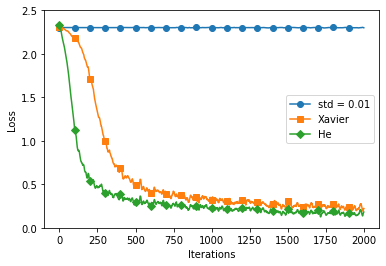

In [17]:
# graph
markers = {'std = 0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker = markers[key],
             markevery = 100, label = key)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.ylim(0, 2.5)
plt.legend()
plt.show()